In [4]:
# KNN Classification
# Read CSV files (training, testing)
# need: euclidean distance -- python version in scipy
# compute euclidean distance from new thing to all training points
# find the k smallest distances
# majority rules (of the k closest training points, which appears the most often?)

# some code we might find useful today...
# import scipy.spatial.distance as ssd, ssd.euclidean()

# numpy ---- np.where(condition, if true, if false).... use for plotting, diff colors for labels

# specialized sorting ---- sort all the distances and pick the k at the beginning
# if we have a 2d list, lst.sort() sorts the first element in every sublist, if we
# want something else, we can specify the key

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd

In [6]:
# Step one -- read in training and testing data
training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")
training.head()

,name,friendliness,intelligence,label
0,Choux,3,8,cat
1,Garfield,2,4,cat
2,Lion-o,5,5,cat
3,Pink Pather,3,5,cat
4,McGruff,6,5,dog


In [7]:
# Step 1A -- just for funsies, plot the training data
training["color"] = np.where(training["label"] == "cat", "orange", "firebrick")
training.head()

,name,friendliness,intelligence,label,color
0,Choux,3,8,cat,orange
1,Garfield,2,4,cat,orange
2,Lion-o,5,5,cat,orange
3,Pink Pather,3,5,cat,orange
4,McGruff,6,5,dog,firebrick


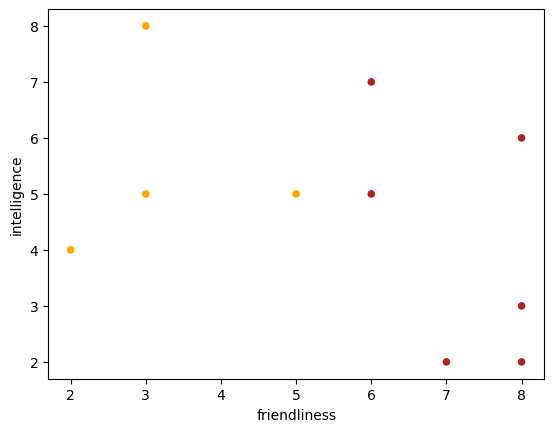

In [8]:
# still plotting
training.plot(kind = "scatter", x = "friendliness", y = "intelligence", c = "color")
plt.show()

In [9]:
# we need euclidean distance --- let's do a quick example
train_ex = training[["friendliness", "intelligence"]].iloc[0]
test_ex = testing[["friendliness", "intelligence"]].iloc[0]
train_ex, test_ex

(friendliness    3
 intelligence    8
 Name: 0, dtype: int64,
 friendliness    8
 intelligence    3
 Name: 0, dtype: int64)

In [10]:
# what is the euclidean distance between ONE testing thign and ONE training thing?
ssd.euclidean(train_ex, test_ex)

7.0710678118654755

In [11]:
# make a list of distances, from test_ex to every row in training
distances = []
for i in range(len(training)):
    train = training[["friendliness", "intelligence"]].iloc[i]
    distance = ssd.euclidean(train, test_ex)
    distances.append((training["name"].iloc[i], training["label"].iloc[i], distance))
distances

[('Choux', 'cat', 7.0710678118654755),
 ('Garfield', 'cat', 6.082762530298219),
 ('Lion-o', 'cat', 3.605551275463989),
 ('Pink Pather', 'cat', 5.385164807134504),
 ('McGruff', 'dog', 2.8284271247461903),
 ('Scooby Doo', 'dog', 0.0),
 ('Odie', 'dog', 1.4142135623730951),
 ('Grizz', 'dog', 3.0),
 ('Carol', 'dog', 4.47213595499958),
 ('Clifford', 'dog', 1.0)]

In [12]:
# Find K smallest distances
K = 3
distances.sort(key = lambda a : a[2])
distances[:K]

[('Scooby Doo', 'dog', 0.0),
 ('Clifford', 'dog', 1.0),
 ('Odie', 'dog', 1.4142135623730951)]

In [14]:
# final step.... of the K smallest distances, which class do we belong to?

In [ ]:
#confusion matrix for 